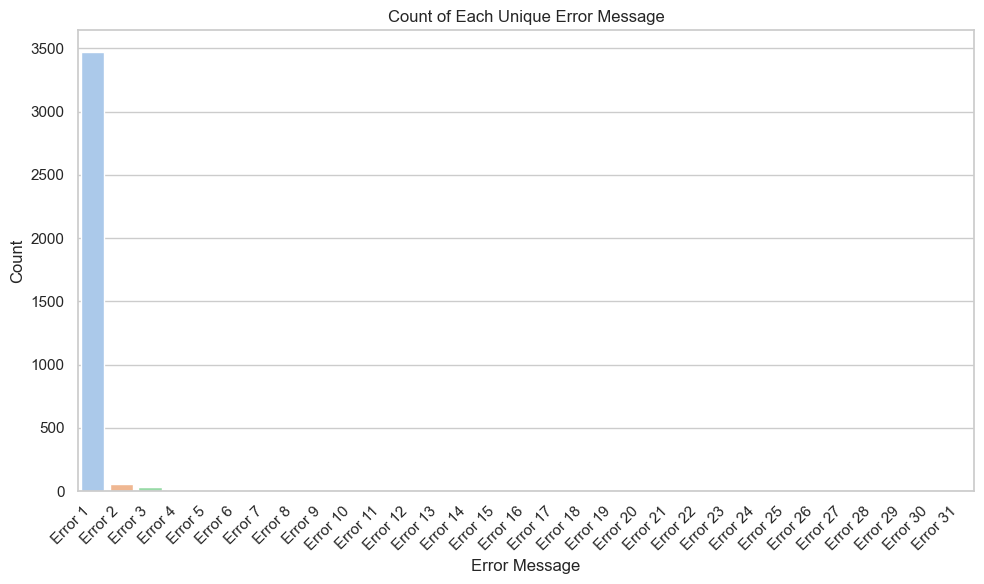

('/Users/neo/Documents/MODS/LL-Eval/error_message_mapping.csv',
 '/Users/neo/Documents/MODS/LL-Eval/error_message_plot.png')

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the provided CSV file
file_path = '/Users/neo/Documents/MODS/LL-Eval/pipeline_error_df.csv'
df = pd.read_csv(file_path)

# Convert all error messages to strings before applying the grouping
df['error_message_grouped'] = df['error_message'].astype(str).apply(
    lambda x: 'Too few focus regions found.' if x.startswith('Too few focus regions found.') else x
)

# Recalculate counts based on the grouped messages
error_counts_grouped = df['error_message_grouped'].value_counts()

# Create a mapping of pseudo labels to the grouped error messages
pseudo_labels_grouped = [f"Error {i+1}" for i in range(len(error_counts_grouped))]
error_mapping = pd.DataFrame({
    'Pseudo_Label': pseudo_labels_grouped,
    'Error_Message': error_counts_grouped.index
})

# Save the mapping to a CSV file
output_path = '/Users/neo/Documents/MODS/LL-Eval/error_message_mapping.csv'
error_mapping.to_csv(output_path, index=False)

# Create a bar plot with seaborn using pastel colors
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    x=pseudo_labels_grouped,
    y=error_counts_grouped.values,
    palette="pastel"
)
bar_plot.set_xlabel('Error Message')
bar_plot.set_ylabel('Count')
bar_plot.set_title('Count of Each Unique Error Message')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, ha="right")

# Save the plot as an image
plot_path = '/Users/neo/Documents/MODS/LL-Eval/error_message_plot.png'
plt.tight_layout()
plt.savefig(plot_path)

# Display the plot in the Jupyter notebook cell
plt.show()

# Display output paths
(output_path, plot_path)
